In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
# Load the dataset
data = pd.read_csv("./Mall_Customers .csv")

In [25]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
data.shape

(200, 5)

In [27]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
data.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [30]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
# Encode 'Gender' column
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data["Gender"])

In [32]:
# Selecting features for clustering
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [33]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

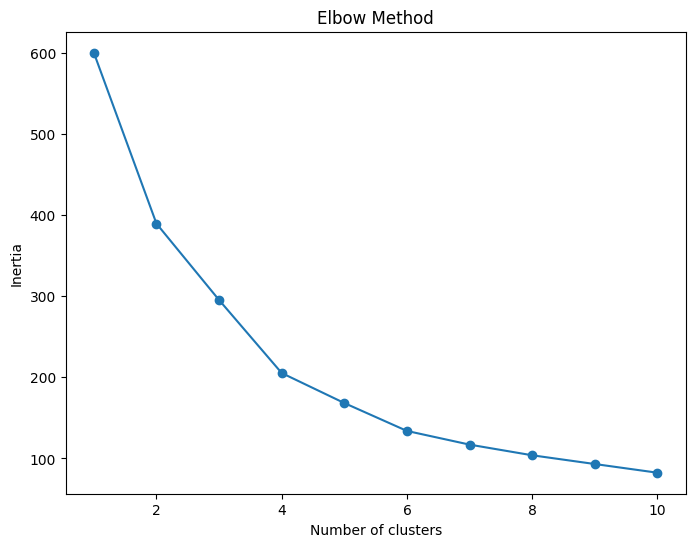

In [34]:
# Using the Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)  # Use scaled data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

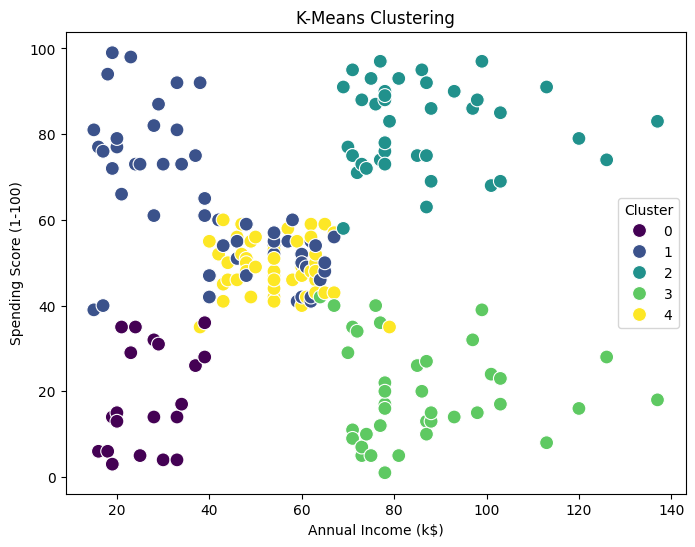

In [35]:
# Choosing k=5 as the optimal number of clusters
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to data

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

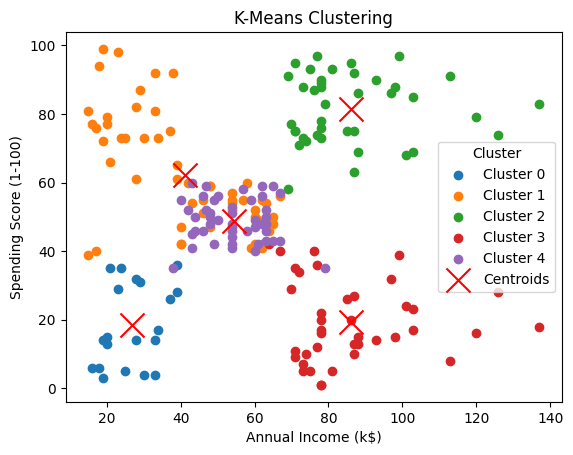

In [36]:
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], 
                label=f'Cluster {i}')

# Plotting centroids
# Since the data was scaled, we need to inverse the scaling of the centroids
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the centroids on the original scale
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], s=300, c='red', marker='x', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [37]:
kmeans.cluster_centers_

array([[ 0.5310735 , -1.2905084 , -1.23646671],
       [-0.98067852, -0.74305983,  0.46744035],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.07333084,  0.97494509, -1.19729675],
       [ 1.20484056, -0.23577338, -0.05236781]])